In [2]:
##STEP 1 
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to clean and preprocess the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Example: Load dataset (Replace this with your actual dataset)
data = pd.read_csv("data_news - data_news.csv")

# Clean the articles' headlines
data['cleaned_headline'] = data['headline'].apply(clean_text)

# Handle missing data (if any)
data.dropna(subset=['cleaned_headline', 'category'], inplace=True)

# Encode labels (Categories)
label_encoder = LabelEncoder()
data['encoded_category'] = label_encoder.fit_transform(data['category'])

# Split the data into training and testing sets
X = data['cleaned_headline']
y = data['encoded_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devir_jnfy7nx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devir_jnfy7nx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devir_jnfy7nx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
## FEATURE EXTRACTION TF-IDF
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit TF-IDF on training data and transform both train and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on test data
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy:  0.7328
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.70      0.67       955
           1       0.74      0.76      0.75       985
           2       0.82      0.75      0.78      1021
           3       0.75      0.69      0.72      1030
           4       0.71      0.65      0.68      1034
           5       0.81      0.84      0.82       995
           6       0.82      0.81      0.82       986
           7       0.75      0.73      0.74      1008
           8       0.60      0.67      0.63      1009
           9       0.71      0.75      0.73       977

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000

Confusion Matrix:
 [[669  20  17  21  68  24   6  23  63  44]
 [ 29 744   9  37  38  35  27  14  31  21]
 [ 24  24 761  27  11  17  29  51  66  11]
 [ 48  34  19 708  36  24  28  

In [5]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy:  0.7246
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.63       955
           1       0.75      0.71      0.73       985
           2       0.79      0.78      0.79      1021
           3       0.69      0.70      0.69      1030
           4       0.71      0.65      0.68      1034
           5       0.80      0.82      0.81       995
           6       0.79      0.82      0.81       986
           7       0.73      0.74      0.73      1008
           8       0.67      0.60      0.64      1009
           9       0.72      0.76      0.74       977

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

Confusion Matrix:
 [[644  19  25  34  80  25  10  28  52  38]
 [ 35 697  11  42  37  35  61  27  22  18]
 [ 30  20 801  29   7  20  23  56  28   7]
 [ 57  34  21 717  30  26  31  28  70  

In [6]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy:  0.7254
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67       955
           1       0.71      0.76      0.74       985
           2       0.82      0.75      0.78      1021
           3       0.73      0.68      0.70      1030
           4       0.69      0.64      0.66      1034
           5       0.85      0.84      0.85       995
           6       0.84      0.79      0.81       986
           7       0.75      0.71      0.73      1008
           8       0.56      0.66      0.61      1009
           9       0.75      0.72      0.73       977

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
 [[685  17  13  20  69  14   5  24  79  29]
 [ 28 752  12  35  47  20  21  21  32  17]
 [ 26  29 766  28  14  12  20  48  67  11]
 [ 48  40  16 700  31  20  26  27 114   8]
 [ 9

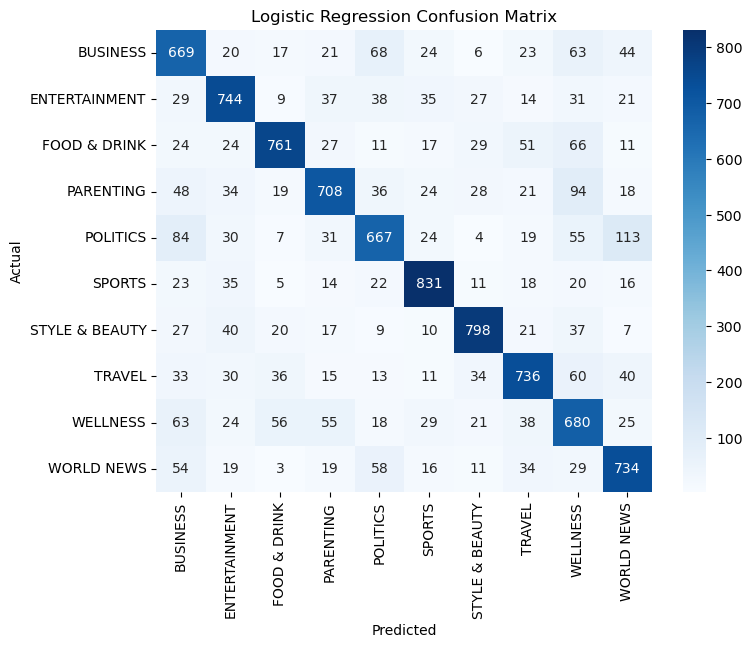

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# For Logistic Regression model
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


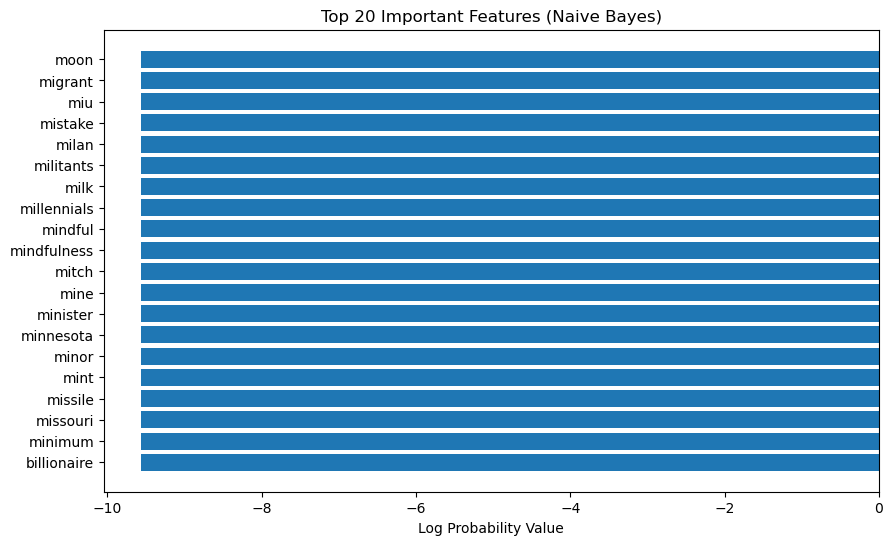

In [14]:
# Get feature importance from Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Get the feature importance (log probabilities of features)
importances_nb = nb_model.feature_log_prob_[1]  # Assuming binary classification for simplicity

# Get the top N important features
top_n = 20  # Top N important features
top_indices_nb = np.argsort(np.abs(importances_nb))[-top_n:][::-1]  # Sort by importance

# Get the feature names
top_features_nb = np.array(tfidf_vectorizer.get_feature_names_out())[top_indices_nb]

# Plot the top features for Naive Bayes
plt.figure(figsize=(10, 6))
plt.barh(top_features_nb, importances_nb[top_indices_nb])
plt.xlabel('Log Probability Value')
plt.title('Top 20 Important Features (Naive Bayes)')
plt.show()


### Project Explanation Summary:

In this project, we built a text classification model to automatically categorize news articles into predefined categories such as sports, politics, and technology. The steps we followed are outlined below:

1. **Data Collection and Preprocessing**:
   - We collected a dataset of news articles and their associated categories.
   - Preprocessing steps included data cleaning, handling missing values, tokenization, and text normalization (removing stopwords).
   - We used **`TfidfVectorizer`** to convert the text data into numerical features, limiting the number of features to 5000 to prevent overfitting and improve performance.

2. **Feature Extraction**:
   - We employed **`TfidfVectorizer`** to extract features from the text data. This method transforms text into numerical form by evaluating the term frequency and inverse document frequency of words.
   - We visualized the distribution of articles across different categories.

3. **Model Development**:
   - We trained two different models for the classification task: **Naive Bayes** and **Support Vector Machine (SVM)**.
   - **Naive Bayes** was used for its effectiveness with text data and probabilistic nature.
   - **SVM** was used for its strong performance in high-dimensional spaces, ideal for text classification tasks.

4. **Model Evaluation**:
   - Both models were evaluated using metrics like **accuracy, precision, recall, and F1-score** to assess their performance.
   - We also plotted **confusion matrices** to visualize the misclassification of different categories.

5. **Feature Importance**:
   - For **Naive Bayes**, we extracted feature importance by examining the **log probabilities** of each feature.
   - For **SVM**, feature importance was derived from the **coefficients of the hyperplane** used to separate different categories.
   - We visualized the top 20 important features for both models.

6. **Conclusion**:
   - After evaluating and comparing both models, we concluded which model performed better in terms of accuracy and other evaluation metrics.
   - We also highlighted the most important features that contributed to the classification decision-making process.

The project demonstrates how machine learning models can automate news article categorization, making it easier for organizations to manage large volumes of content and recommend relevant articles to readers.

---

